In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HousingPrices.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [9]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [10]:
X = df.drop("median_house_value", axis = 1)
y = df["median_house_value"]

In [11]:
cat_col = ['ocean_proximity']
num_cols = X.drop(columns=cat_col).columns

In [12]:
from sklearn.compose import ColumnTransformer

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ]
)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [17]:
X_train = preprocessor.fit_transform(X_train)

In [18]:
X_test = preprocessor.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
mse = cross_val_score(model,X_train, y_train, scoring= 'neg_mean_squared_error',cv =10)

In [23]:
np.mean(mse)

-4766049982.447604

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model_pred = model.predict(X_test)

In [27]:
model_pred

array([ 65435.75052487, 133815.59213186, 263463.62941832, ...,
       283840.43397153, 113960.40616162, 219047.40125173])

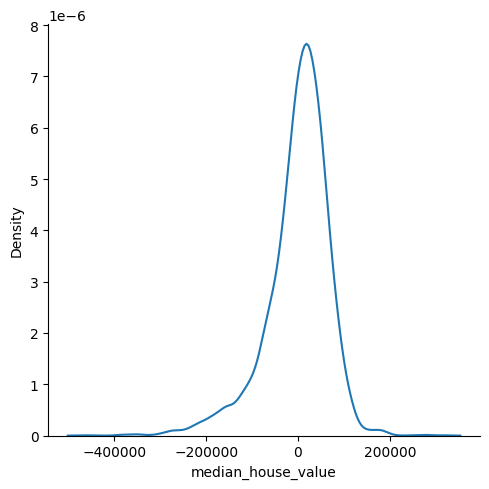

In [28]:
import seaborn as sns
sns.displot(model_pred-y_test, kind = 'kde')

In [29]:
from sklearn.metrics import r2_score

In [30]:
score_r2 = r2_score(model_pred, y_test)

In [31]:
score_r2

0.4491496402374946

## Ridge Regression Algorithm

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [34]:
ridge_regressor = Ridge()

In [35]:
ridge_regressor

Ridge()

In [37]:
parameters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90] }
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring = 'neg_mean_squared_error', cv= 10)
ridgecv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [38]:
print(ridgecv.best_params_)

{'alpha': 1}


In [40]:
print(ridgecv.best_score_)

-4765969579.400347


In [41]:
ridge_pred = ridgecv.predict(X_test)

In [42]:
ridge_pred

array([ 65472.17709933, 133855.25446471, 263417.3661954 , ...,
       283831.34031753, 113952.56483311, 219023.460558  ])

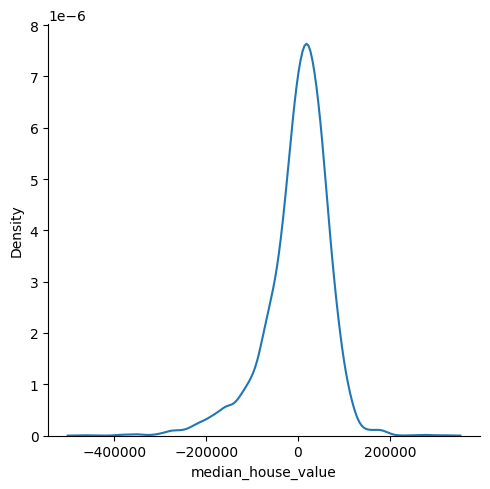

In [43]:
import seaborn as sns
sns.displot(ridge_pred-y_test, kind = 'kde')

In [44]:
score_r2 = r2_score(ridge_pred, y_test)
score_r2

0.44894581791414956

## Lasso Regression Algorithm

In [45]:
from sklearn.linear_model import Lasso

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
lasso_regressor = Lasso()

In [51]:
lasso_regressor

Lasso()

In [52]:
parameters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90] }
lassocv = GridSearchCV(lasso_regressor, parameters, scoring = 'neg_mean_squared_error', cv= 10)
lassocv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [53]:
print(lassocv.best_params_)

{'alpha': 1}


In [54]:
print(lassocv.best_score_)

-4766058359.015081


In [56]:
lasso_pred = lassocv.predict(X_test)

In [57]:
lasso_pred

array([ 65443.5645886 , 133827.403909  , 263450.64977309, ...,
       283842.50999295, 113962.70120416, 219045.94630476])

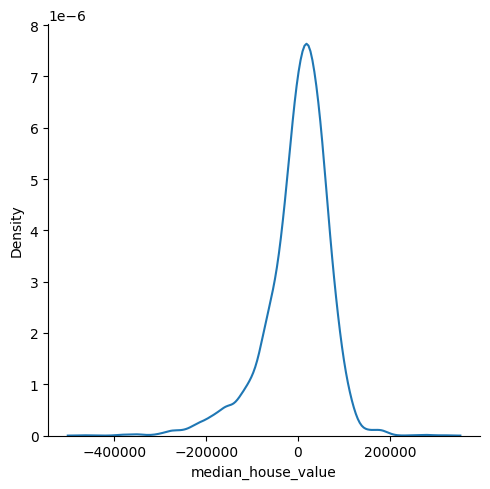

In [58]:
import seaborn as sns
sns.displot(lasso_pred-y_test, kind = 'kde')